# Decipher Repeating-Key XOR

interesting cases: keys of repeted length also works. ex: if encoding key is of length 2. you will get same answer when length is 4.


In [1]:
import math
import random
import string
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from typing import List, Tuple

In [2]:
plain_text = b'British troops entered Cuxhaven at on May from now on all radio traffic will cease wishing you all the best Lt Kunkel'

In [3]:
plain_text = plain_text.lower()

In [4]:
plain_text

b'british troops entered cuxhaven at on may from now on all radio traffic will cease wishing you all the best lt kunkel'

In [5]:
key = b'$^'

In [6]:
def repeating_key_xor(text: bytes, key: bytes) -> bytes:
    key = (key * (len(plain_text)//len(key) + 1))[:len(plain_text)]
    return bytes([b ^ k for b, k in zip(text, key)])

In [7]:
list(b'abcdefghijkl')

[97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]

In [8]:
repeating_key_xor(b'abcdefghijkl', b'$^')

b'E<G:A8C6M4O2'

In [9]:
list(repeating_key_xor(b'abcdefghijkl', b'$^'))

[69, 60, 71, 58, 65, 56, 67, 54, 77, 52, 79, 50]

In [10]:
repeating_key_xor(b'E<G:A8C6M4O2', b'$^')

b'abcdefghijkl'

In [11]:
cipher_text = repeating_key_xor(plain_text, random.sample(range(255), 13))

In [12]:
cipher_text

b'k\x18\xc7\x1f\x9f\xbf\x01\x95U\xac\x11t\xb0zJ\xcb\x05\x82\xa9\x1b\xd0E\xfe\x1dn\xb8a\x0b\xd8\x0e\x98\xec\x08\xc1\x01\xb1\x10;\xadh\x13\x8e\r\x84\xa3\x04\x95O\xb1\t;\xafgJ\xcf\x07\x9a\xec\x1b\xd4E\xb7\x11;\xb4{\x0b\xc8\r\x9f\xafI\xc2H\xb2\x12;\xa3l\x0b\xdd\x0e\xd6\xbb\x00\xc6I\xb7\x10|\xe0p\x05\xdbK\x97\xa0\x05\x95U\xb6\x1b;\xa2l\x19\xdaK\x9a\xb8I\xdeT\xb0\x15~\xac'

we first need to know the key length. key length can be estimated with how close the decoding text will be to english. the proeprty that we use is that fact that english letters are very close to each other so their hamming distance will be very less.

In [13]:
def hamming_distance_bytes(text1:bytes, text2:bytes) -> int:
    dist = 0
    for byte1, byte2 in zip(text1, text2):
        dist += bin(byte1 ^ byte2).count('1')
    return dist


def hamming_score_bytes(text1:bytes, text2:bytes) -> float:
    return hamming_distance_bytes(text1, text2) / (8 * min(len(text1), len(text2)))

In [14]:
hamming_distance_bytes(b'abc', b'zb')

4

In [15]:
hamming_score_bytes(b'abc', b'zb')

0.25

In [16]:
def plot_linears(keys, scores, title=None):
    plt.plot(keys, scores, label="Distribution English")
    plt.xlabel('Key Lengths')
    plt.ylabel('Normalized Hamming Score')
    plt.title(title)
    plt.legend()
    plt.show()

In [17]:
def compute_key_length(text: bytes, plot=False) -> int:
    """The function will try to minimize the hamming distance between the two
    
    assumption 
    """
    keys, scores = [], []
    min_score, key_len = None, None
    for klen in range(2, len(text)//2 + 1):
        if plot:
            print(f"trying keylen {klen}, len(text) = {len(text)}")
        chunks = [
            text[i: i+klen]
            for i in range(0, len(text), klen)
        ]
        if len(chunks) >= 2 and len(chunks[-1]) <= len(chunks[-2])/2:
            chunks.pop()
        
        _scores = []
        if plot:
            print(klen, [len(c) for c in chunks])
        for i in range(0, len(chunks) - 1, 1):
            for j in range(i+1, len(chunks), 1):
                # if plot:
                    # print(len(chunks[i]), len(chunks[j]))
                    
                score = hamming_score_bytes(chunks[i], chunks[j])
                _scores.append(score)

        score = sum(_scores) / len(_scores)
        
        if plot:
            keys.append(klen)
            scores.append(score)

        if min_score is None or score < min_score:
            min_score, key_len = score, klen

    if plot:
        plot_linears(keys, scores, title="Score vs Key Lengths")
    return key_len

trying keylen 2, len(text) = 117
2 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
trying keylen 3, len(text) = 117
3 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
trying keylen 4, len(text) = 117
4 [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
trying keylen 5, len(text) = 117
5 [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
trying keylen 6, len(text) = 117
6 [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
trying keylen 7, len(text) = 117
7 [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5]
trying keylen 8, len(text) = 117
8 [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5]
trying keylen 9, len(text) = 117
9 [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
trying keylen 10, len(text) = 117
10 [10, 10, 10, 10, 10, 10, 10, 10, 10,

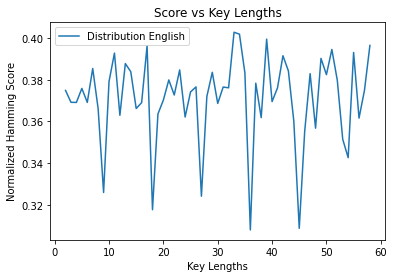

In [18]:
key = b"$43132^21"
cipher_text = repeating_key_xor(plain_text, key)
ck = compute_key_length(cipher_text, plot=True)
assert math.gcd(ck, len(key)) == len(key)

In [19]:
count, total = 0, 100
for _ in range(total):
    _key = random.sample(range(255), random.randint(2,16))
    _cipher = repeating_key_xor(plain_text, _key)
    ck = compute_key_length(_cipher)
    try:
        assert math.gcd(ck, len(_key)) == len(_key)
        count += 1
    except AssertionError as e:
        pass

print(f"accuracy {count/total}")

accuracy 0.99


In [20]:
for x in range(2, len(cipher_text)//2 + 1):
    cipher_text = repeating_key_xor(plain_text, random.sample(range(255), x))
    key_len = compute_key_length(cipher_text)
    try:
        assert math.gcd(key_len, x) == x
    except AssertionError as e:
        compute_key_length(cipher_text, plot=True)
        print(f"Hypothesis failed: actual key length {x}, observed key length {key_len}")
        print(f"plain text {len(plain_text)}, cipher {len(cipher_text)}")
        raise e

In [21]:
sentences = [
    b'His mind was blown that there was nothing in space except space itself.',
    b'I love bacon, beer, birds, and baboons.',
    b'With a single flip of the coin, his life changed forever.',
    b'If you like tuna and tomato sauce - try combining the two. It\'s really not as bad as it sounds.',
    b'The view from the lighthouse excited even the most seasoned traveler.',
    b'The small white buoys marked the location of hundreds of crab pots.',
    b'Be careful with that butter knife.',
    b'We have young kids who often walk into our room at night for various reasons including clowns in the closet.',
    b'Mary plays the piano.',
    b'The lake is a long way from here.',
    b'Buried deep in the snow, he hoped his batteries were fresh in his avalanche beacon.',
    b'Swim at your own risk was taken as a challenge for the group of Kansas City college students.',
    b'Peanut butter and jelly caused the elderly lady to think about her past.',
    b'They say that dogs are man\'s best friend, but this cat was setting out to sabotage that theory.',
    b'He found a leprechaun in his walnut shell.',
    b'She traveled because it cost the same as therapy and was a lot more enjoyable.',
    b'Had he known what was going to happen, he would have never stepped into the shower.',
    b'She wanted a pet platypus but ended up getting a duck and a ferret instead.',
    b'The near-death experience brought new ideas to light.',
    b'I was very proud of my nickname throughout high school but today - I couldn\'t be any different to what my nickname was.',
    b'It\'s not often you find a soggy banana on the street.',
    b'The doll spun around in circles in hopes of coming alive.',
    b'You\'re unsure whether or not to trust him, but very thankful that you wore a turtle neck.',
    b'Shakespeare was a famous 17th-century diesel mechanic.',
    b'There\'s a message for you if you look up.',
    b'She had the gift of being able to paint songs.',
    b'Hit me with your pet shark!',
    b'Abstraction is often one floor above you.',
    b'David subscribes to the "stuff your tent into the bag" strategy over nicely folding it.',
    b'The rusty nail stood erect, angled at a 45-degree angle, just waiting for the perfect barefoot to come along.',
    b'Joyce enjoyed eating pancakes with ketchup.',
    b'Let me help you with your baggage.',
    b'The door slammed on the watermelon.',
    b'The tour bus was packed with teenage girls heading toward their next adventure.',
    b'The skeleton had skeletons of his own in the closet.',
    b'25 years later, she still regretted that specific moment.',
    b'There were three sphered rocks congregating in a cubed room.',
    b'The thick foliage and intertwined vines made the hike nearly impossible.',
    b'The stranger officiates the meal.',
    b'She says she has the ability to hear the soundtrack of your life.',
    b'I am counting my calories, yet I really want dessert.',
    b'He had unknowingly taken up sleepwalking as a nighttime hobby.',
    b'I\'m confused: when people ask me what\'s up, and I point, they groan.',
    b'He\'s in a boy band which doesn\'t make much sense for a snake.',
    b'Combines are no longer just for farms.',
    b'There are few things better in life than a slice of pie.',
    b'Greetings from the galaxy MACS0647-JD, or what we call home.',
    b'She was the type of girl who wanted to live in a pink house.',
    b'Smoky the Bear secretly started the fires.',
    b'He didn\'t understand why the bird wanted to ride the bicycle.',
    b'He quietly entered the museum as the super bowl started.',
    b'Nobody loves a pig wearing lipstick.',
    b'Shakespeare was a famous 17th-century diesel mechanic.',
    b'He had decided to accept his fate of accepting his fate.',
    b'She saw no irony asking me to change but wanting me to accept her for who she is.',
    b'The lyrics of the song sounded like fingernails on a chalkboard.',
    b'Various sea birds are elegant, but nothing is as elegant as a gliding pelican.',
    b'The newly planted trees were held up by wooden frames in hopes they could survive the next storm.',
    b'She only paints with bold colors; she does not like pastels.',
    b'The urgent care center was flooded with patients after the news of a new deadly virus was made public.',
    b'The light in his life was actually a fire burning all around him.',
    b'I would have gotten the promotion, but my attendance wasn\'t good enough.',
    b'He had a hidden stash underneath the floorboards in the back room of the house.',
    b'There can never be too many cherries on an ice cream sundae.',
    b'The thunderous roar of the jet overhead confirmed her worst fears.',
    b'We should play with legos at camp.',
    b'He was surprised that his immense laziness was inspirational to others.',
    b'Bill ran from the giraffe toward the dolphin.',
    b'The waves were crashing on the shore; it was a lovely sight.',
    b'Check back tomorrow; I will see if the book has arrived.',
    b'The irony of the situation wasn\'t lost on anyone in the room.',
    b'Her hair was windswept as she rode in the black convertible.',
    b'It was the scarcity that fueled his creativity.',
    b'Everyone says they love nature until they realize how dangerous she can be.',
    b'Sometimes, all you need to do is completely make an ass of yourself and laugh it off to realise that life isn\'t so bad after all.',
    b'You\'re unsure whether or not to trust him, but very thankful that you wore a turtle neck.',
    b'She found his complete dullness interesting.',
    b'The paintbrush was angry at the color the artist chose to use.',
    b'his seven-layer cake only had six layers.',
    b'Even though he thought the world was flat he didn\'t see the irony of wanting to travel around the world.',
    b'She tilted her head back and let whip cream stream into her mouth while taking a bath.',
    b'She hadn\'t had her cup of coffee, and that made things all the worse.',
    b'Flying fish few by the space station.',
    b'The blinking lights of the antenna tower came into focus just as I heard a loud snap.',
    b'He poured rocks in the dungeon of his mind.',
    b'Sometimes it is better to just walk away from things and go back to them later when you\'re in a better frame of mind.',
    b'There\'s an art to getting your way, and spitting olive pits across the table isn\'t it.',
    b'I am counting my calories, yet I really want dessert.',
    b'As you consider all the possible ways to improve yourself and the world, you notice John Travolta seems fairly unhappy.',
    b'After exploring the abandoned building, he started to believe in ghosts.',
    b'He invested some skill points in Charisma and Strength.',
    b'The blue parrot drove by the hitchhiking mongoose.',
    b'Had he known what was going to happen, he would have never stepped into the shower.',
    b'It was a slippery slope and he was willing to slide all the way to the deepest depths.',
    b'Going from child, to childish, to childlike is only a matter of time.',
    b'The door slammed on the watermelon.',
    b'They got there early, and they got really good seats.',
    b'There was coal in his stocking and he was thrilled.',
    b'He is good at eating pickles and telling women about his emotional problems.',
    b'The three-year-old girl ran down the beach as the kite flew behind her.',
]

In [22]:
for sentence in sentences:
    sentence = sentence.lower()
    encryption_key = random.sample(range(255), random.randint(5, (len(sentence)//2) - 1))
    _cipher = repeating_key_xor(sentence, encryption_key)
    try:
        ck = compute_key_length(_cipher)
        assert math.gcd(ck, len(encryption_key)) == len(encryption_key)
    except AssertionError as e:
        ck = compute_key_length(_cipher, plot=True)
        print(f"actual key {len(encryption_key)}, computed {ck}")
        raise e